In [1]:
using Pkg
Pkg.add("FFTW")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


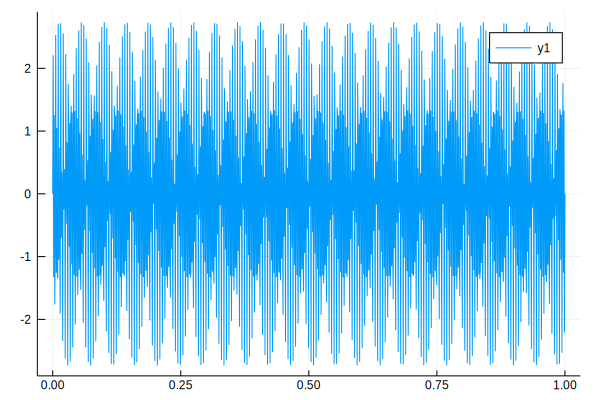

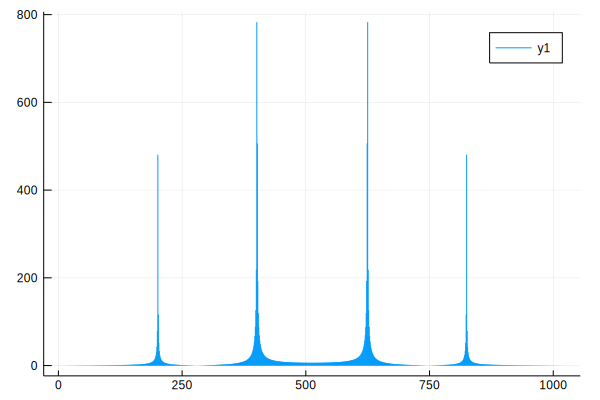

In [2]:
# ZAD 1
using FFTW, Plots

Fs = 1024;  

t = 0:1/(Fs-1):1; 

x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)
display(plot(t,x))


y=fft(x)
display(sticks((abs.(fft(x)))))

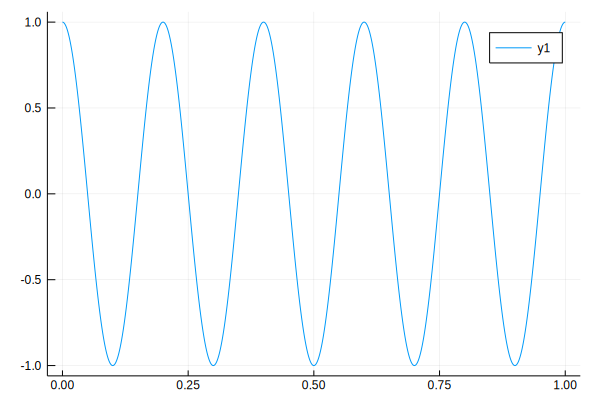

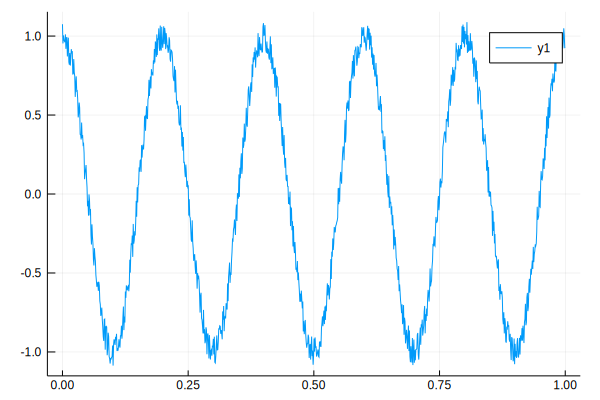

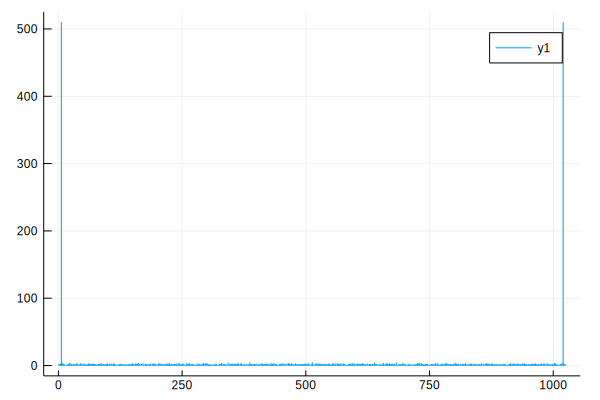

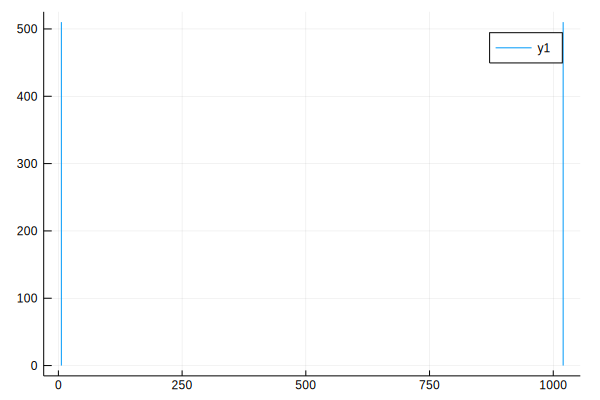

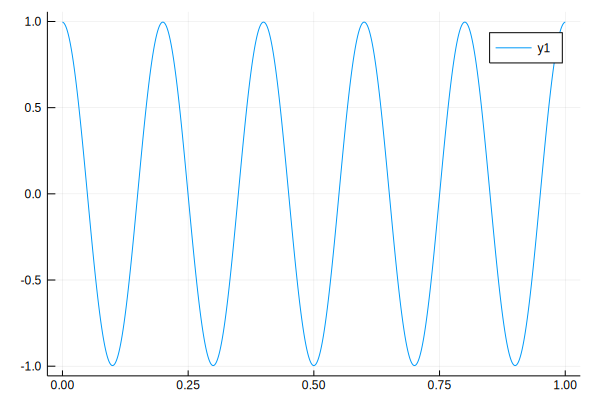

In [3]:
# ZAD 2
using FFTW, Plots

Fs = 1024;  

t = 0:1/(Fs-1):1; 

x2 = cos.(2*pi*t*5)
display(plot(t,x2))
for i in 1:length(x2)
    x2[i] += (rand(Float64)*2-1)*0.1
end


display(plot(t,x2))

y=fft(x2)
display(sticks((abs.(y))))

threshold = 50
for i in 1:length(y)
    if abs(y[i]) < threshold
        y[i] = 0
    end
end
display(sticks((abs.(y))))

x2_red = ifft(y)
plot(t, real.(x2_red))

In [4]:
using Pkg
Pkg.add("WAV")
Pkg.add("PlotlyJS")
Pkg.add("Interpolations")
Pkg.add("Polynomials")
Pkg.add("Dierckx")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [5]:
# ZAD 3

function fft_effect(name, add_x, scale_x, clamp_y)

    snd, sampFreq = wavread(name)
    s1 = snd[:,1] #channel1

    #display FFT every 20 points
    function display_fft(fft_y)
        fft_x = 1:length(fft_y)
        fft_y_s = abs.(fft_y[1:20:length(fft_y)])
        fft_x_s = fft_x[1:20:length(fft_y)]
        display(plot(fft_x_s, fft_y_s)) 
    end

    timeArray = (0:(length(s1)-1)) / sampFreq
    display("Oryginalna ścieżka dźwiękowa")
    display(plot(timeArray, s1))

    fft_y = fft(s1)

    new_fft_y = Array{Complex{Float64}}(undef, length(fft_y))
    
    #fill with zeros
    for i in 1:length(fft_y)
        new_fft_y[i] = 0.0 + 0.0im
    end

    for i in 1:round(Int,(length(fft_y)/2))
        x = 1 + i * scale_x + add_x
        if(x > 0 && x < (length(fft_y)/2))
            x_f = floor(Int, x)
            x_c = ceil(Int, x)
            perc = x - x_c
            val = fft_y[x_f] + (fft_y[x_c] - fft_y[x_f]) * perc #interpolate value bettwen x_f and x_c
            if(abs(val) < clamp_y) #delete if necessary
                val = clamp_y 
            end
            new_fft_y[i+1] = val
            new_fft_y[length(fft_y)-i+1] = conj(val) #FFT mirror
        end

    end

    display("Stare FFT")
    display_fft(fft_y)
    display("Nowe FFT")
    display_fft(new_fft_y)

    s2 = ifft(new_fft_y)
    s2real = real.(s2)

    #sometimes there are weird noises at beginning and ending
    for i in 1:100
        s2real[i]=0
    end
    for i in length(s2)-100:length(s2)
        s2real[i]=0
    end  
    
    display("Nowa ścieżka dźwiękowa")
    display(plot(timeArray, s2real))

    wavplay(s2real, sampFreq)
    return s2real
end

function play_sound(name)
    snd, sampFreq = wavread(name)
    s1 = snd[:,1] #channel1
    wavplay(s1, sampFreq)
end

play_sound (generic function with 1 method)

In [ ]:
using WAV, FFTW, Plots

display("Oryginalny dźwięk")
play_sound("auuu.wav")


In [ ]:
display("Obniżony dźwięk")
data = fft_effect("auuu.wav", 300, 1, 0)
wavwrite(data, "auuu_lower.wav", Fs=44100)

In [ ]:
display("Oryginalny dźwięk z szumem")
play_sound("auuu_noise.wav")

In [ ]:
display("Oryginalny dźwięk bez szumu")
data = fft_effect("auuu_noise.wav", 0, 1, 15)
wavwrite(data, "auuu_without_noise.wav", Fs=44100)